# Bombay Bank Stocks Comparison
_________________

###### - The data has been called using Quandl API
###### - The stocks that we will be considering for this analysis:
- Icici Bank Ltd. EOD Prices | BOM532174
- Kotak Mahindra Bank Ltd. EOD Prices | BOM500247
- Hdfc Bank Ltd EOD Prices | BOM500180
- State Bank Of India EOD Prices | BOM500112
- Axis Bank Ltd. EOD Prices | BOM532215

In [1]:
# Importing the packages required

import warnings
warnings.filterwarnings('ignore')
import quandl
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from datetime import datetime, timedelta, date
quandl.ApiConfig.api_key = "Zw4HzyWiBwoB8fiGTS4M"
from mpl_finance import candlestick_ohlc
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
%matplotlib inline

C:\Users\obero\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
# Setting the start and end dates to call our data using

start_date = '2015-01-01'

end_date = datetime(date.today().year, date.today().month, date.today().day)

In [3]:
# Calling the data using the API package

icici_data = quandl.get('BSE/BOM532174', start_date = start_date,end_date = end_date)
kotak_data = quandl.get('BSE/BOM500247', start_date = start_date,end_date = end_date)
hdfc_data = quandl.get('BSE/BOM500180', start_date = start_date,end_date = end_date)
sbi_data = quandl.get('BSE/BOM500112', start_date = start_date,end_date = end_date)
axis_data = quandl.get('BSE/BOM532215', start_date = start_date,end_date = end_date)

In [4]:
# Taking a look at our data

sbi_data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2015-01-01,312.0,315.00,311.00,313.95,313.672293,864506.0,18224.0,271171579.0,290730.0,33.63,4.00,1.95
2015-01-02,314.8,318.00,314.60,315.25,316.587615,1911714.0,25426.0,605224976.0,905460.0,47.36,3.40,0.45
2015-01-05,316.9,316.90,310.35,312.60,313.370539,1857756.0,23893.0,582165999.0,624951.0,33.64,6.55,-4.30
2015-01-06,310.0,310.75,298.70,299.95,304.425645,2185348.0,47077.0,665275974.0,965952.0,44.20,12.05,-10.05
2015-01-07,300.0,302.85,295.40,300.35,300.051658,1926894.0,36965.0,578167739.0,568887.0,29.52,7.45,0.35


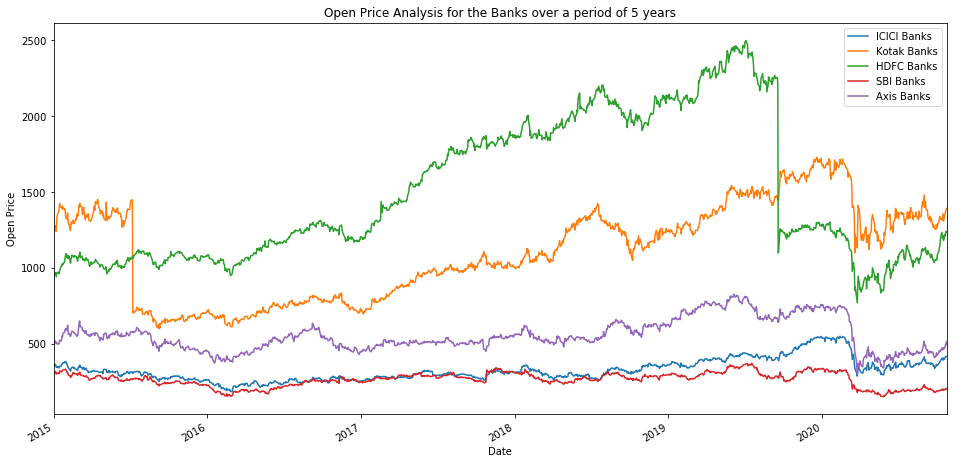

In [5]:
# Plotting the Open price since 1st Jan 2015 for all to compare movement

icici_data['Open'].plot(label='ICICI Banks',figsize=(16,8),title='Open Price Analysis for the Banks over a period of 5 years')
kotak_data['Open'].plot(label='Kotak Banks')
hdfc_data['Open'].plot(label='HDFC Banks')
sbi_data['Open'].plot(label='SBI Banks')
axis_data['Open'].plot(label='Axis Banks')

plt.ylabel('Open Price')
plt.legend();

#### Very clearly, all stocks are regaining values after lossing their values due to some events respectively. The HDFC Bank and Kotak Mahindra Bank stocks have been the more volatile stocks when it comes to risk analysis. 

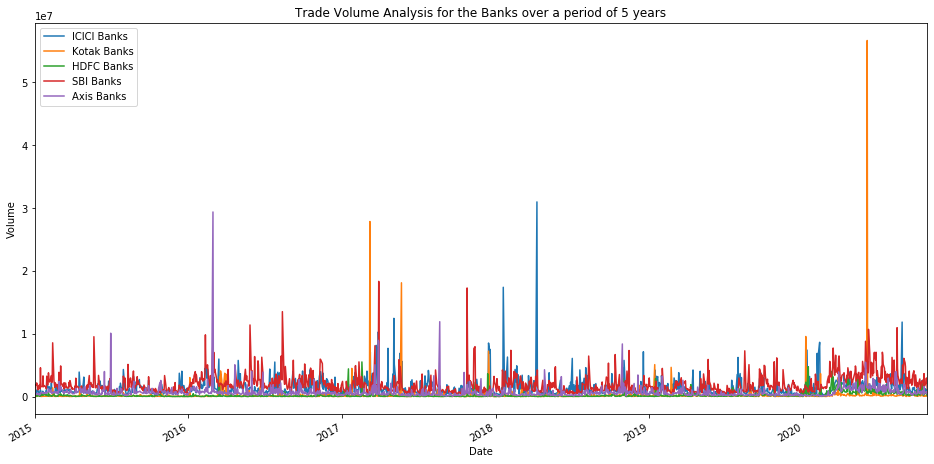

In [6]:
# Plotting the Volume since 1st Jan 2015 for all to compare movement

icici_data['No. of Shares'].plot(label='ICICI Banks',figsize=(16,8),title='Trade Volume Analysis for the Banks over a period of 5 years')
kotak_data['No. of Shares'].plot(label='Kotak Banks')
hdfc_data['No. of Shares'].plot(label='HDFC Banks')
sbi_data['No. of Shares'].plot(label='SBI Banks')
axis_data['No. of Shares'].plot(label='Axis Banks')

plt.ylabel('Volume')
plt.legend();

In [7]:
# Maximum volume traded for SBI Bank
# https://economictimes.indiatimes.com/markets/stocks/news/top-stocks-in-focus-on-wednesday-29-march-2017/articleshow/57884625.cms

sbi_data['No. of Shares'].argmax()

Timestamp('2017-03-29 00:00:00')

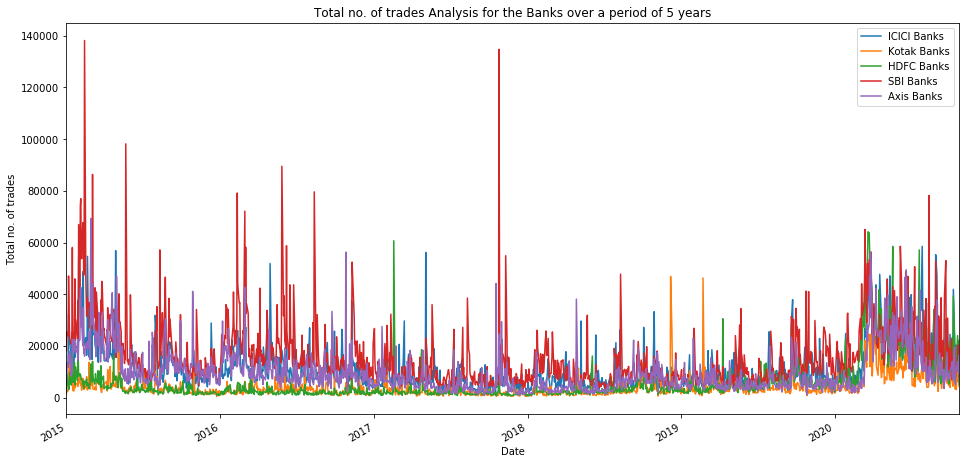

In [8]:
# Plotting the total no. of trades since 1st Jan 2015 for all to compare movement

icici_data['No. of Trades'].plot(label='ICICI Banks',figsize=(16,8),title='Total no. of trades Analysis for the Banks over a period of 5 years')
kotak_data['No. of Trades'].plot(label='Kotak Banks')
hdfc_data['No. of Trades'].plot(label='HDFC Banks')
sbi_data['No. of Trades'].plot(label='SBI Banks')
axis_data['No. of Trades'].plot(label='Axis Banks')

plt.ylabel('Total no. of trades')
plt.legend();

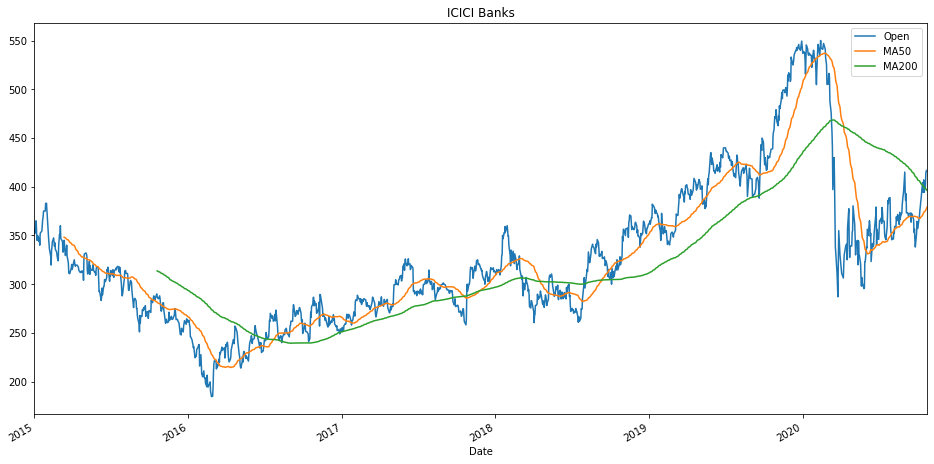

In [9]:
# Plotting the graph for ICICI Banks with 50 and 200 MAs

icici_data['MA50'] = icici_data['Open'].rolling(50).mean()
icici_data['MA200'] = icici_data['Open'].rolling(200).mean()
icici_data[['Open','MA50','MA200']].plot(title='ICICI Banks',figsize=(16,8));

In [10]:
# Creating a dataframe for Opening prices of all banks' stocks

bank_stocks = pd.concat([icici_data['Open'],kotak_data['Open'],hdfc_data['Open'],sbi_data['Open'],axis_data['Open']],axis=1)

bank_stocks.columns = ['ICICI Bank Open','Kotak Mahindra Bank Open','HDFC Bank Open','SBI Bank Open','Axis Bank Open']

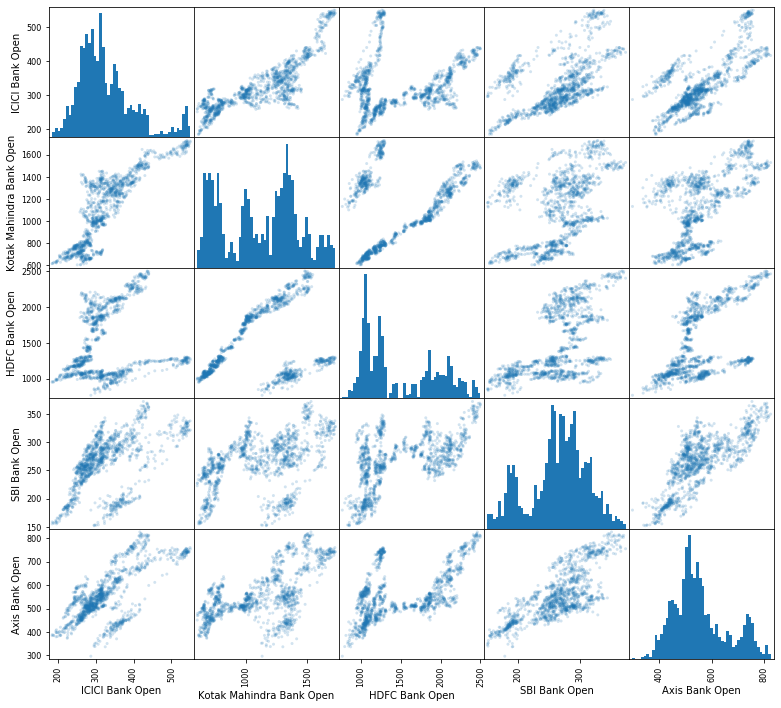

In [11]:
# You can use a semi-colon to remove the axes print out

scatter_matrix(bank_stocks,figsize=(13,12),alpha=0.2,hist_kwds={'bins':50});

In [12]:
# Candle presentation 1

'''
# Rest the index to get a column of January Dates
icici_reset = icici_data.loc['2015-01':'2015-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
icici_reset['date_ax'] = icici_reset['Date'].apply(lambda date: date2num(date))
icici_values = [tuple(vals) for vals in icici_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, icici_values, width=0.6, colorup='g',colordown='r');
'''

# Candle presentation 2

'''
iday = icici_data.loc['2019-01-01':'2019-12-31',:]
mpf.plot(iday,type='candle',mav=(4,50))
'''

"\niday = icici_data.loc['2019-01-01':'2019-12-31',:]\nmpf.plot(iday,type='candle',mav=(4,50))\n"

## Daily Percent Change Comparison

#### Daily Percent Change just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. 

##### Formula:
$ r_t = \frac{p_t}{p_{t-1}} -1$

In [14]:
# Making a column for daily returns through pandas in-built callable method

plt.style.use('default')

icici_data['returns'] = icici_data['Close'].pct_change(1)
kotak_data['returns'] = kotak_data['Close'].pct_change(1)
hdfc_data['returns'] = hdfc_data['Close'].pct_change(1)
sbi_data['returns'] = sbi_data['Close'].pct_change(1)
axis_data['returns'] = axis_data['Close'].pct_change(1)

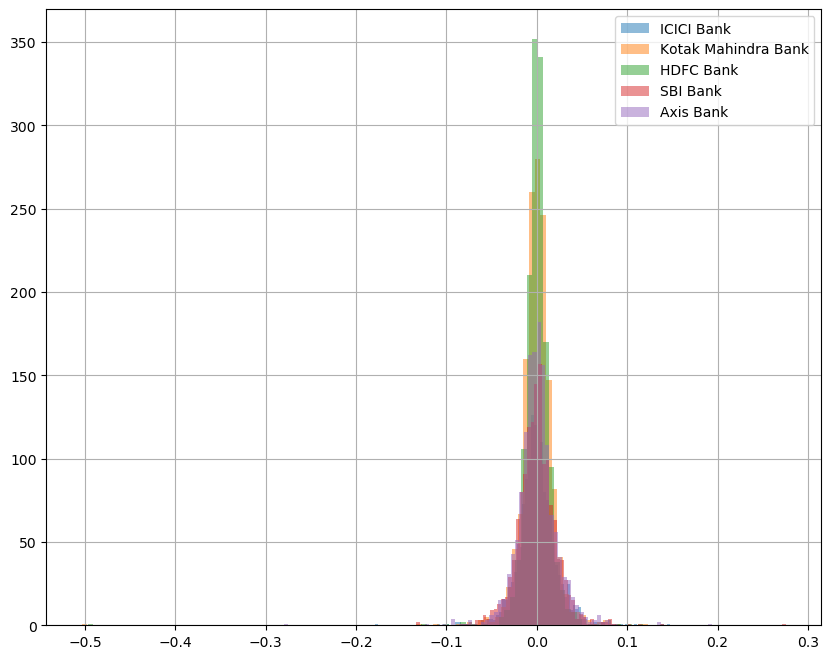

In [15]:
# Plotting the daily returns

icici_data['returns'].hist(bins=100,label='ICICI Bank',figsize=(10,8),alpha=0.5)
kotak_data['returns'].hist(bins=100,label='Kotak Mahindra Bank',alpha=0.5)
hdfc_data['returns'].hist(bins=100,label='HDFC Bank',alpha=0.5)
sbi_data['returns'].hist(bins=100,label='SBI Bank',alpha=0.5)
axis_data['returns'].hist(bins=100,label='Axis Bank',alpha=0.5)
plt.legend();

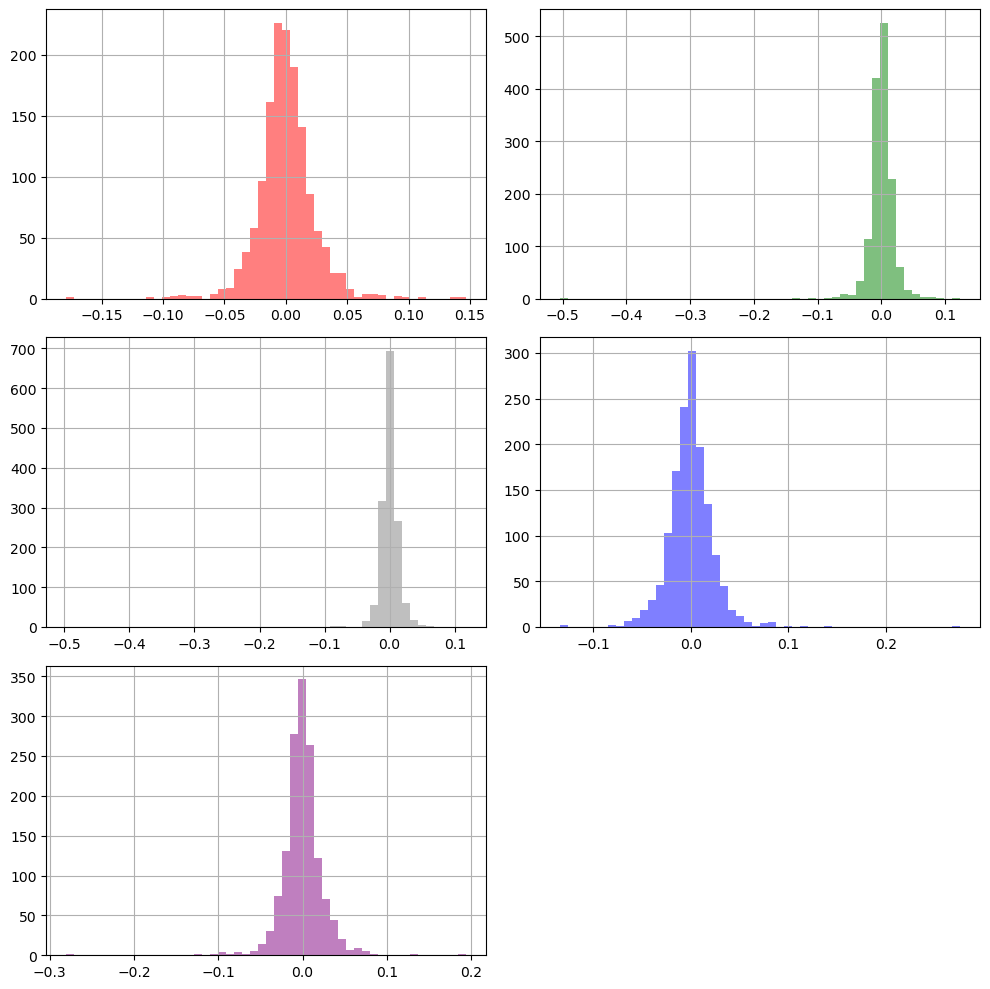

In [16]:
# Individual analysis of daily returns

fig, ax = plt.subplots(3,2,figsize = (10,10))
fig.delaxes(ax[-1,-1])
                       
icici_data['returns'].hist(bins=50,ax=ax[0,0],color='red',alpha=0.5,);
kotak_data['returns'].hist(bins=50,ax=ax[0,1],color='green',alpha=0.5);
hdfc_data['returns'].hist(bins=50,ax=ax[1,0],color='grey',alpha=0.5);
sbi_data['returns'].hist(bins=50,ax=ax[1,1],color='blue',alpha=0.5);
axis_data['returns'].hist(bins=50,ax=ax[2,0],color='purple',alpha=0.5);
plt.tight_layout()

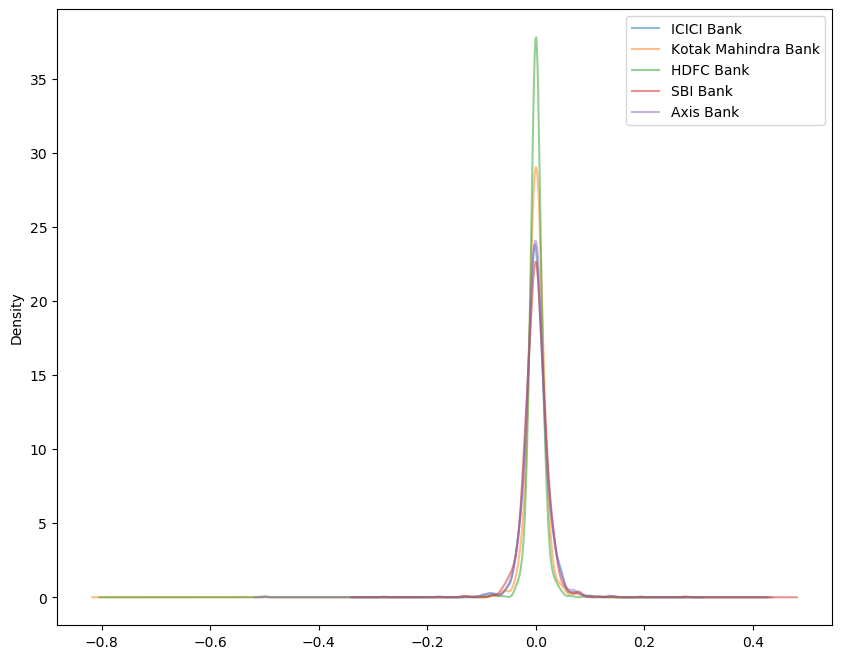

In [17]:
# KDE Plot of daily returns for clearer vision

icici_data['returns'].plot(kind='kde',label='ICICI Bank',figsize=(10,8),alpha=0.5)
kotak_data['returns'].plot(kind='kde',label='Kotak Mahindra Bank',alpha=0.5)
hdfc_data['returns'].plot(kind='kde',label='HDFC Bank',alpha=0.5)
sbi_data['returns'].plot(kind='kde',label='SBI Bank',alpha=0.5)
axis_data['returns'].plot(kind='kde',label='Axis Bank',alpha=0.5)
plt.legend();

In [19]:
# Making a dataframe of all returns

stocks_return = pd.concat([icici_data['returns'],kotak_data['returns'],hdfc_data['returns'],sbi_data['returns'],axis_data['returns']],axis=1)

stocks_return.columns = ['ICICI Bank Open','Kotak Mahindra Bank Open','HDFC Bank Open','SBI Bank Open','Axis Bank Open']

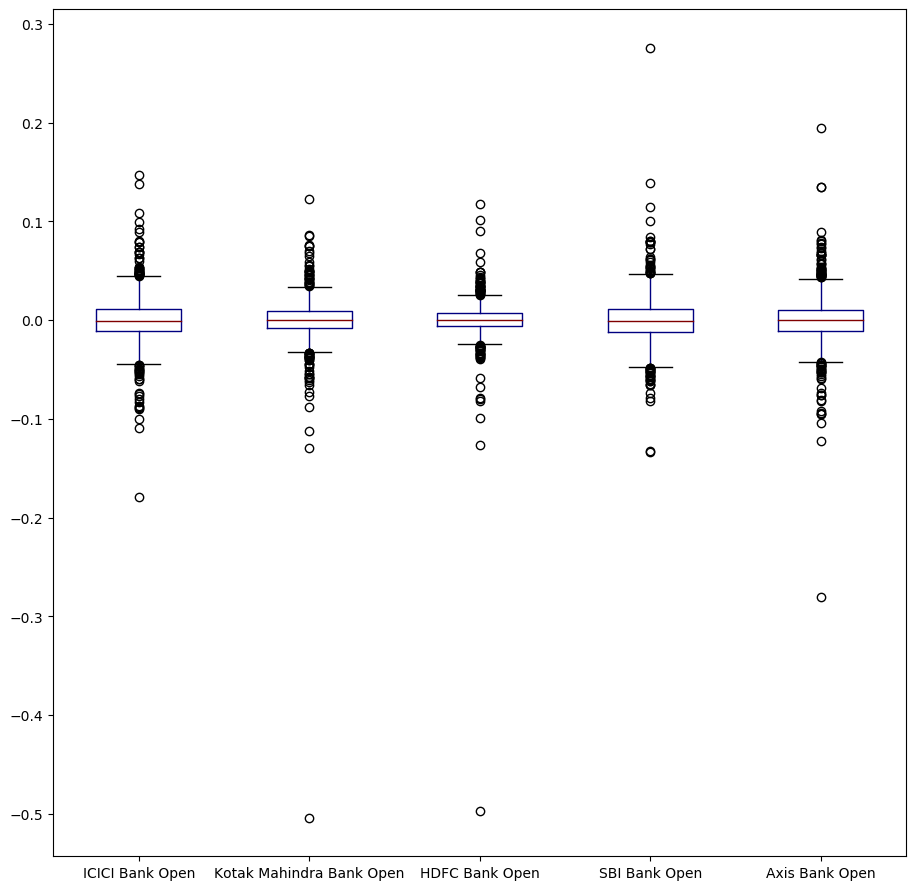

In [20]:
# Plotting returns for further analysis

stocks_return.plot(kind='box',figsize=(11,11),colormap='jet');

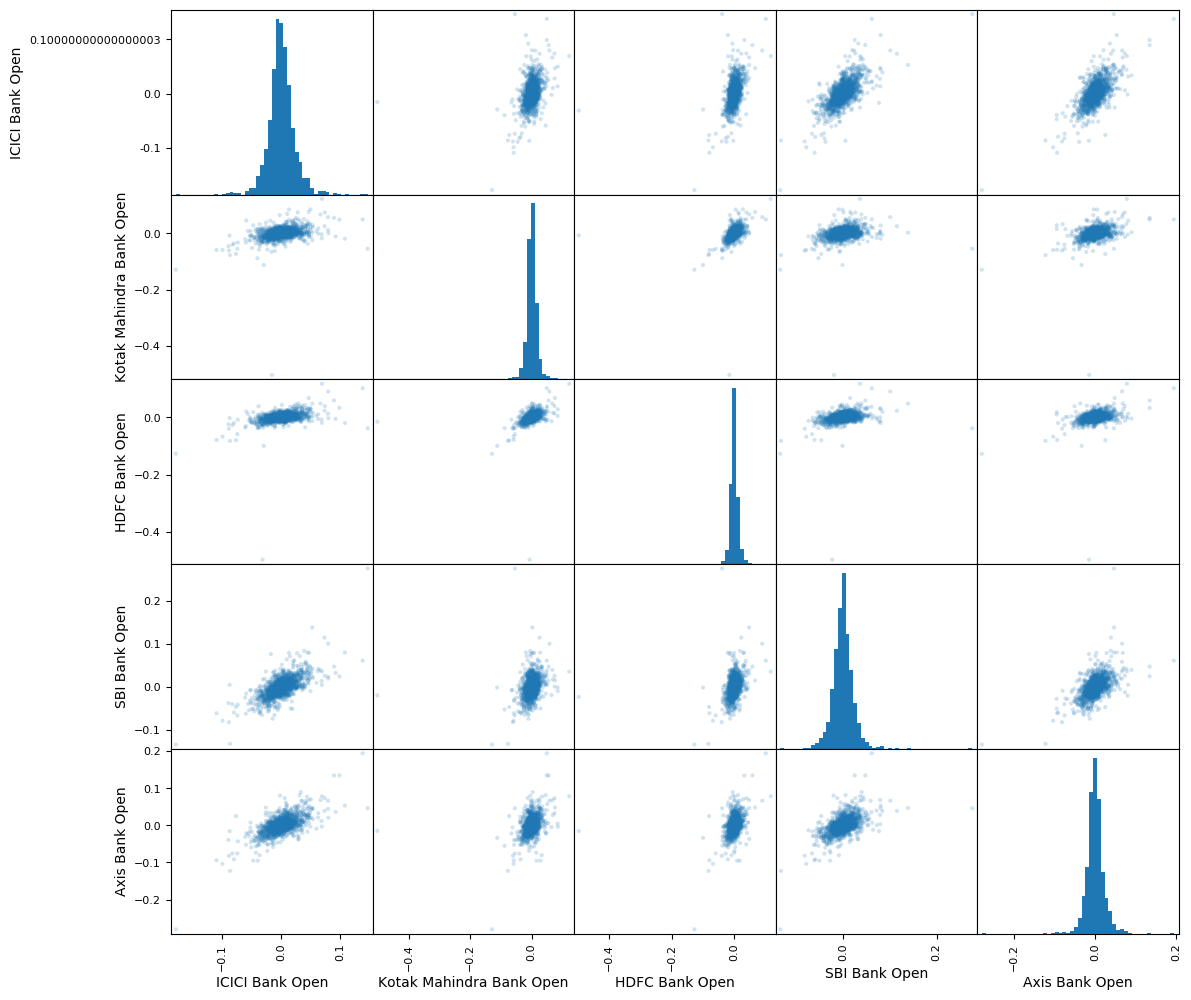

In [21]:
# Checking for correlation between the daily returns of the stocks

scatter_matrix(stocks_return,figsize=(13,12),alpha=0.2,hist_kwds={'bins':50});

#### While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made. If cumulative return is above one, you are making profits else you are in loss. 

In [24]:
# Cummulative returns

icici_data['Cumulative Return'] = (1 + icici_data['returns']).cumprod()
kotak_data['Cumulative Return'] = (1 + kotak_data['returns']).cumprod()
hdfc_data['Cumulative Return'] = (1 + hdfc_data['returns']).cumprod()
sbi_data['Cumulative Return'] = (1 + sbi_data['returns']).cumprod()
axis_data['Cumulative Return'] = (1 + axis_data['returns']).cumprod()

In [25]:
icici_data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,,,,,,
2015-01-01,355.45,355.45,350.30,352.70,352.230102,249724.0,7454.0,87960310.0,77387.0,30.99,5.15,-2.75,NaN,NaN,NaN,NaN
2015-01-02,352.00,363.40,352.00,362.60,360.230437,486333.0,13422.0,175191949.0,181580.0,37.34,11.40,10.60,NaN,NaN,0.028069,1.028069
2015-01-05,365.00,367.10,361.50,363.10,364.365589,475745.0,13173.0,173345107.0,184641.0,38.81,5.60,-1.90,NaN,NaN,0.001379,1.029487
2015-01-06,360.00,360.00,346.15,347.85,351.506361,894885.0,32121.0,314557770.0,383779.0,42.89,13.85,-12.15,NaN,NaN,-0.041999,0.986249
2015-01-07,345.80,347.00,335.50,338.70,339.578217,1094164.0,30678.0,371554260.0,366395.0,33.49,11.50,-7.10,NaN,NaN,-0.026304,0.960306


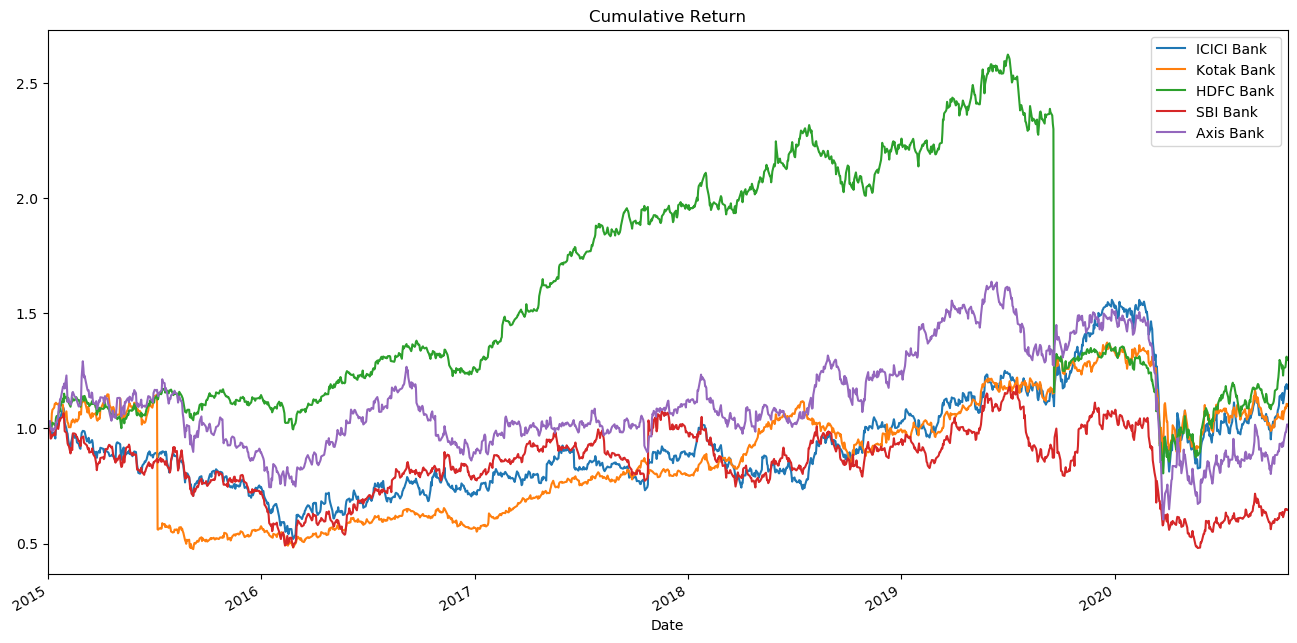

In [26]:
# Comparing the cumulative returns

icici_data['Cumulative Return'].plot(label='ICICI Bank',figsize=(16,8),title='Cumulative Return')
kotak_data['Cumulative Return'].plot(label='Kotak Bank')
hdfc_data['Cumulative Return'].plot(label='HDFC Bank')
sbi_data['Cumulative Return'].plot(label='SBI Bank')
axis_data['Cumulative Return'].plot(label='Axis Bank')

plt.legend();